In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

WeekMapDF = pd.read_excel('DFs\\WeekMapDF.xlsx')
StoresDF = pd.read_excel('DFs\\StoresDF.xlsx')
BeerDF = pd.read_excel('DFs\\BeerDF.xlsx')
CustDemographicDF = pd.read_excel('DFs\\CustDemographicDF.xlsx')
StoreTransactionsDF = pd.read_excel('DFs\\StoreTransactionsDF.xlsx')
CustTransactionsDF = pd.read_excel('DFs\\CustTransactionsDF.xlsx')
BeerTransactionsDF = pd.read_excel('DFs\\BeerTransactionsDF.xlsx')

In [26]:
WeekMapDF

,WEEK,WEEK_DATE,MONTH,SEASON,HOLIDAY,IS_HOLIDAY
0,1479,2007-12-31,12,Winter,NaN,0
1,1480,2008-01-07,1,Winter,NaN,0
2,1481,2008-01-14,1,Winter,NaN,0
3,1482,2008-01-21,1,Winter,NaN,0
4,1483,2008-01-28,1,Winter,NaN,0
...,...,...,...,...,...,...
517,1996,2017-11-27,11,Fall,NaN,0
518,1997,2017-12-04,12,Winter,NaN,0
519,1998,2017-12-11,12,Winter,NaN,0
520,1999,2017-12-18,12,Winter,NaN,0


In [11]:
StoresDF
#EST_ACV - Estimated All Commodity Volume (Estimate of annualized sales in millions)

,IRI_KEY,EST_ACV
0,228037,11.85000
1,233779,27.22899
2,250845,29.98000
3,257871,39.95898
4,264075,29.98000
5,653776,46.49899
6,1085053,71.45697


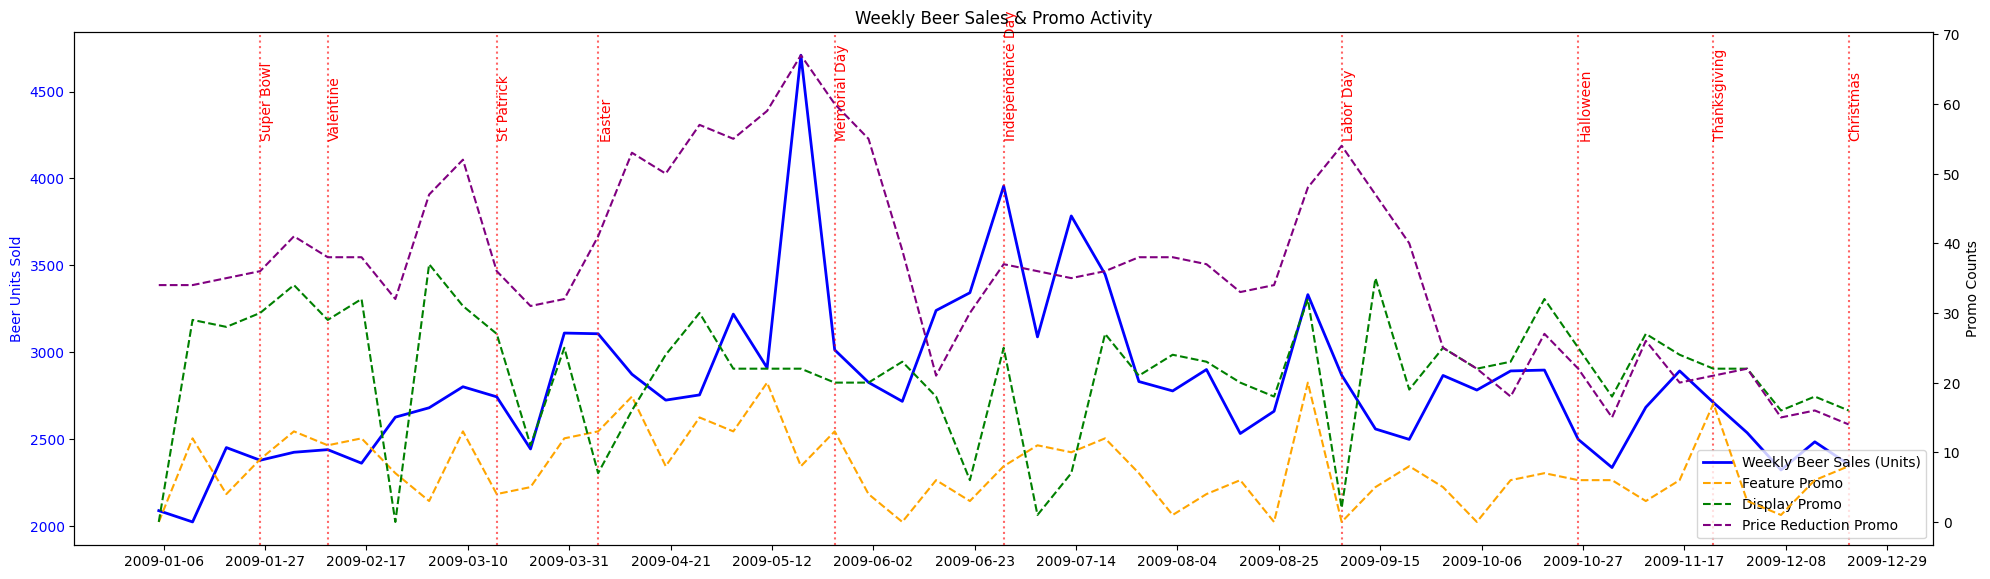

In [ ]:
store = pd.read_excel("DFs\\StoreTransactionsDF.xlsx", usecols=["IRI_KEY","WEEK","UNITS","FEATURE","DISPLAY","PRICE_REDUCTION","WEEK_DATE"])
store = store[store["IRI_KEY"] == 257871].copy()
weekmap = pd.read_excel("DFs\\WeekMapDF.xlsx")

# Filter 2009
store["WEEK_DATE"] = pd.to_datetime(store["WEEK_DATE"])
store_2009 = store[store["WEEK_DATE"].dt.year == 2009].copy()
weekmap["WEEK_DATE"] = pd.to_datetime(weekmap["WEEK_DATE"])
weekmap_2009 = weekmap[weekmap["WEEK_DATE"].dt.year == 2009].copy()

# Aggregate weekly sales & promo
weekly_sales = store_2009.groupby("WEEK_DATE").agg({
    "UNITS":"sum",
    "FEATURE":"sum",
    "DISPLAY":"sum",
    "PRICE_REDUCTION":"sum"
}).reset_index()

# Merge with holidays
weekly_sales = weekly_sales.merge(weekmap_2009[["WEEK_DATE","IS_HOLIDAY","HOLIDAY"]], on="WEEK_DATE", how="left")

# Plot
# The promo variables (FEATURE, DISPLAY, PRICE_REDUCTION) are counts and much smaller scale than units.
# Let's normalize them or plot on secondary axis for better visibility.

plt.figure(figsize=(20,6))

# Plot sales on primary y-axis
ax1 = plt.gca()
ax1.plot(weekly_sales["WEEK_DATE"], weekly_sales["UNITS"], color="blue", label="Weekly Beer Sales (Units)", linewidth=2)
ax1.set_ylabel("Beer Units Sold", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot promo activity on secondary y-axis (right side)
ax2 = ax1.twinx()
ax2.plot(weekly_sales["WEEK_DATE"], weekly_sales["FEATURE"], label="Feature Promo", linestyle="--", color="orange")
ax2.plot(weekly_sales["WEEK_DATE"], weekly_sales["DISPLAY"], label="Display Promo", linestyle="--", color="green")
ax2.plot(weekly_sales["WEEK_DATE"], weekly_sales["PRICE_REDUCTION"], label="Price Reduction Promo", linestyle="--", color="purple")
ax2.set_ylabel("Promo Counts", color="black")

# Holiday annotations
for _, row in weekly_sales[weekly_sales["IS_HOLIDAY"]==1].iterrows():
    ax1.axvline(row["WEEK_DATE"], color="red", linestyle=":", alpha=0.6)
    if pd.notna(row["HOLIDAY"]):
        ax1.text(row["WEEK_DATE"], max(weekly_sales["UNITS"])*0.9, str(row["HOLIDAY"]), 
                 rotation=90, color="red", fontsize=10)

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

# Format x-axis to show week dates clearly
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))  # every 4 weeks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

plt.title("Weekly Beer Sales & Promo Activity")
plt.xlabel("Week")
plt.tight_layout()
plt.show()


In [16]:
StoreTX = StoreTransactionsDF[StoreTransactionsDF['IRI_KEY'] == 257871].copy()
CustTX = CustTransactionsDF[CustTransactionsDF['IRI_KEY'] == 257871].copy()
BeerTX = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY'] == 257871].copy()
BeerTX["PANID"].nunique()
#CustTX.shape[0] #11225
#StoreTX['UNITS'].sum() #146536
#BeerTX['BEER_UNITS'].sum() #2861

332

In [17]:
dataframes = {
    #'BeerFullTransactionsDF': BeerFullTransactionsDF,
    'BeerTransactionsDF': BeerTransactionsDF,
    'CustTransactionsDF': CustTransactionsDF,
    'StoreTransactionsDF': StoreTransactionsDF
}

total_unique = pd.concat([CustTransactionsDF["PANID"], BeerTransactionsDF["PANID"]]).nunique()

for name, df in dataframes.items():
    num_rows = df.shape[0]
    num_panids = df['PANID'].nunique() if 'PANID' in df.columns else 'N/A'
    print(f"{name}:")
    print(f"  - Transactions (rows): {num_rows}")
    print(f"  - Unique PANIDs       : {num_panids}\n")
print('Total customers: ',total_unique)

BeerTransactionsDF:
  - Transactions (rows): 5424
  - Unique PANIDs       : 553

CustTransactionsDF:
  - Transactions (rows): 47947
  - Unique PANIDs       : 550

StoreTransactionsDF:
  - Transactions (rows): 109616
  - Unique PANIDs       : N/A

Total customers:  553


In [18]:
print('Unique PANIDs:\n',BeerTransactionsDF.groupby('IRI_KEY')['PANID'].nunique())
print('\n# of transactions:\n',BeerTransactionsDF.groupby('IRI_KEY').size())

Unique PANIDs:
 IRI_KEY
257871     332
1085053    386
Name: PANID, dtype: int64

# of transactions:
 IRI_KEY
257871     2368
1085053    3056
dtype: int64


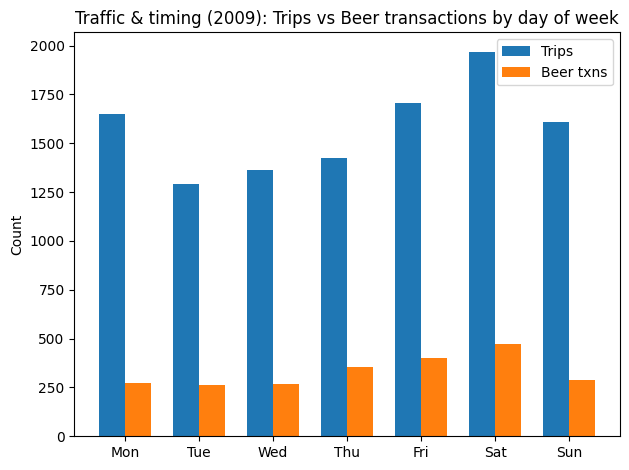

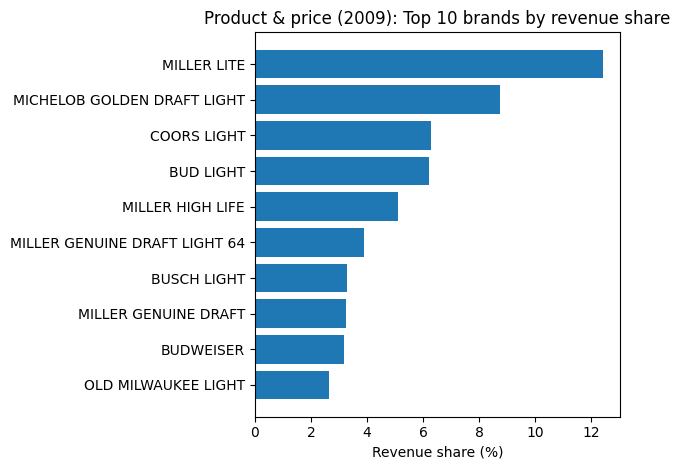

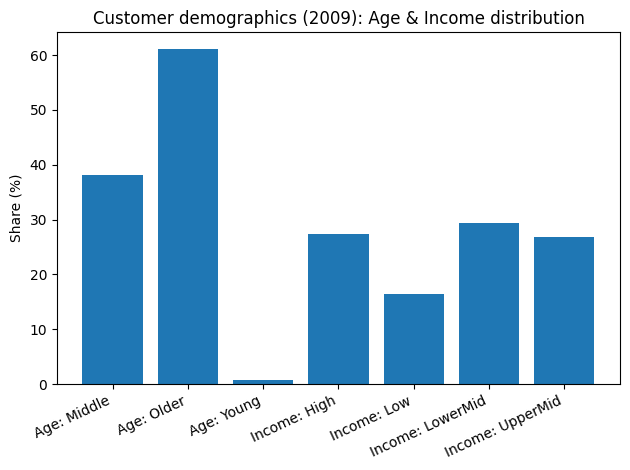

In [2]:
# Create three simple, easy-to-interpret charts for 2009, Store 257871:
# 1) Traffic & timing: Day-of-week Trips vs Beer Transactions (grouped bars)
# 2) Product & price: Top 10 brands by revenue share (bar chart)
# 3) Customer demographics: Age & Income distribution (percent, combined bar chart)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

STORE_ID = 257871

# ---------------------
# Load data
# ---------------------
BeerTX = pd.read_excel("DFs\\BeerTransactionsDF.xlsx")
StoreTX = pd.read_excel("DFs\\StoreTransactionsDF.xlsx")
CustTX  = pd.read_excel("DFs\\CustTransactionsDF.xlsx")
WeekMap = pd.read_excel("DFs\\WeekMapDF.xlsx")
BeerDF  = pd.read_excel("DFs\\BeerDF.xlsx")
CustDem = pd.read_excel("DFs\\CustDemographicDF.xlsx")

# Filter store
BeerTX  = BeerTX[BeerTX["IRI_KEY"] == STORE_ID].copy()
StoreTX = StoreTX[StoreTX["IRI_KEY"] == STORE_ID].copy()
CustTX  = CustTX[CustTX["IRI_KEY"] == STORE_ID].copy()

# Helper to add WEEK_DATE if only WEEK present
def add_week_date(df):
    if "WEEK_DATE" in df.columns:
        df["WEEK_DATE"] = pd.to_datetime(df["WEEK_DATE"]); return df
    elif "WEEK" in df.columns:
        wm = WeekMap[["WEEK","WEEK_DATE"]].copy(); wm["WEEK_DATE"] = pd.to_datetime(wm["WEEK_DATE"])
        return df.merge(wm, on="WEEK", how="left")
    else:
        return df

BeerTX  = add_week_date(BeerTX)
StoreTX = add_week_date(StoreTX)
CustTX  = add_week_date(CustTX)
WeekMap["WEEK_DATE"] = pd.to_datetime(WeekMap["WEEK_DATE"])

# Keep 2009
mask2009_store = (StoreTX["WEEK_DATE"].dt.year == 2009)
mask2009_cust  = (CustTX["WEEK_DATE"].dt.year == 2009)
mask2009_beer  = (BeerTX["WEEK_DATE"].dt.year == 2009)

S2009 = StoreTX.loc[mask2009_store].copy()
C2009 = CustTX.loc[mask2009_cust].copy()
B2009 = BeerTX.loc[mask2009_beer].copy()

# ---------------------
# (1) Traffic & timing: Day-of-week Trips vs Beer Transactions
# ---------------------
def compute_dow(df):
    if "MINUTE" in df.columns:
        dow = (df["MINUTE"] // 1440).astype(int)
    else:
        # fallback if missing: treat as 0; but here we have MINUTE in both
        dow = pd.Series([0]*len(df), index=df.index)
    return dow.clip(0,6)

C2009["DOW"] = compute_dow(C2009)
B2009["DOW"] = compute_dow(B2009)

trips_by_dow = C2009.groupby("DOW", as_index=False).size().rename(columns={"size":"TRIPS"})
beer_by_dow = B2009.groupby("DOW", as_index=False).size().rename(columns={"size":"BEER_TXNS"})
dow = trips_by_dow.merge(beer_by_dow, on="DOW", how="outer").fillna(0)

# Sort by Monday..Sunday labels
dow_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
dow["DOW"] = dow["DOW"].astype(int).clip(0,6)
dow = dow.sort_values("DOW")
x = np.arange(7)
width = 0.35

plt.figure()
plt.bar(x - width/2, dow["TRIPS"].values, width, label="Trips")
plt.bar(x + width/2, dow["BEER_TXNS"].values, width, label="Beer txns")
plt.xticks(x, dow_labels)
plt.ylabel("Count")
plt.title("Traffic & timing (2009): Trips vs Beer transactions by day of week")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------
# (2) Product & price: Top 10 brands by revenue share
# ---------------------
# Join brand info and compute revenue
S2009["UPC"] = S2009["UPC"].astype(str)
BeerDF["UPC"] = BeerDF["UPC"].astype(str)
S2009b = S2009.merge(BeerDF[["UPC","BRAND"]], on="UPC", how="left")

# revenue = UNITS * UNIT_PRICE (fallback if needed)
if "UNITS" not in S2009b.columns: S2009b["UNITS"] = 0.0
if "UNIT_PRICE" not in S2009b.columns:
    if {"PURCHASE_PRICE","UNITS"}.issubset(S2009b.columns) and S2009b["UNITS"].sum()>0:
        S2009b["UNIT_PRICE"] = S2009b["PURCHASE_PRICE"] / S2009b["UNITS"]
    else:
        S2009b["UNIT_PRICE"] = 0.0
S2009b["REVENUE"] = S2009b["UNITS"] * S2009b["UNIT_PRICE"]

brand_rev = (S2009b.groupby("BRAND", as_index=False)["REVENUE"].sum()
             .sort_values("REVENUE", ascending=False))
brand_rev["SHARE"] = brand_rev["REVENUE"]/brand_rev["REVENUE"].sum()

top_n = 10
top = brand_rev.head(top_n).copy()
top["SHARE_PCT"] = (top["SHARE"]*100)

plt.figure()
plt.barh(top["BRAND"].iloc[::-1], top["SHARE_PCT"].iloc[::-1].values)
plt.xlabel("Revenue share (%)")
plt.title(f"Product & price (2009): Top {top_n} brands by revenue share")
plt.tight_layout()
plt.show()

# ---------------------
# (3) Customer demographics: Age & Income distribution (percent)
# ---------------------
shoppers = C2009["PANID"].dropna().unique()
demo = CustDem[CustDem["PANID"].isin(shoppers)].copy()

def income_bin(x):
    try:
        x = float(x)
    except Exception:
        return np.nan
    if pd.isna(x): return np.nan
    if x <= 4: return "Income: Low"
    elif x <= 7: return "Income: LowerMid"
    elif x <= 10: return "Income: UpperMid"
    else: return "Income: High"

def age_bin(x):
    try:
        x = float(x)
    except Exception:
        return np.nan
    if pd.isna(x): return np.nan
    if x <= 2: return "Age: Young"
    elif x <= 4: return "Age: Middle"
    else: return "Age: Older"

demo["INCOME_BIN"] = demo["INCOME"].apply(income_bin) if "INCOME" in demo.columns else np.nan
demo["AGE_BIN"]    = demo["AGE_HH"].apply(age_bin)    if "AGE_HH" in demo.columns else np.nan

# Shares
age_share = demo["AGE_BIN"].value_counts(normalize=True).sort_index() * 100
inc_share = demo["INCOME_BIN"].value_counts(normalize=True).sort_index() * 100

# Combine into one series for a single chart
combined = pd.concat([age_share, inc_share]).dropna()
cats = combined.index.tolist()
vals = combined.values

plt.figure()
plt.bar(cats, vals)
plt.ylabel("Share (%)")
plt.title("Customer demographics (2009): Age & Income distribution")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()


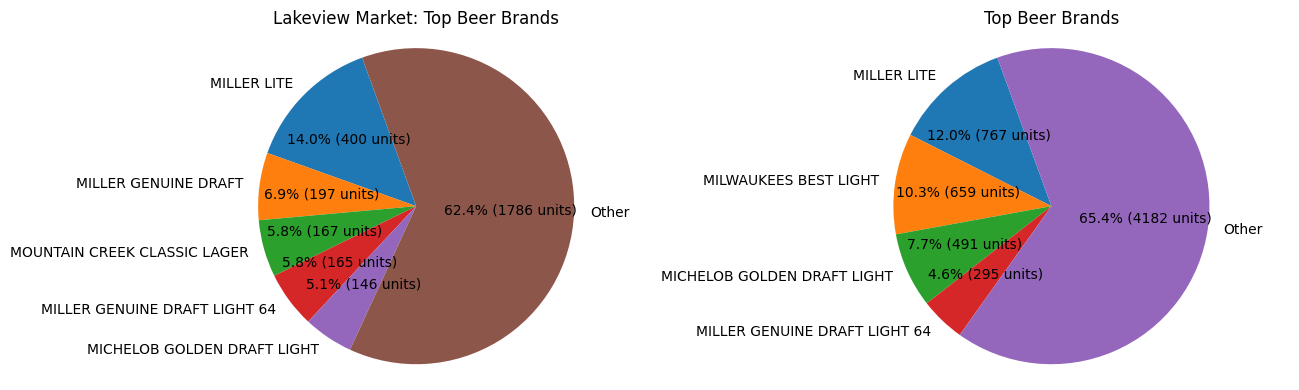

In [19]:
def make_label(values):
    def label_formatter(pct):
        total = sum(values)
        absolute = int(round(pct * total / 100.0))
        return f"{pct:.1f}% ({absolute} units)"
    return label_formatter


brand_units_store_257871 = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY']==257871].groupby('BRAND')['BEER_UNITS'].sum().sort_values(ascending=False)
top_4_store = brand_units_store_257871.head(5)
other_units = brand_units_store_257871.iloc[5:].sum()
store_257871 = pd.concat([top_4_store, pd.Series({'Other': other_units})])

brand_units_store_1085053 = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY']==1085053].groupby('BRAND')['BEER_UNITS'].sum().sort_values(ascending=False)
top_4_store = brand_units_store_1085053.head(4)
other_units = brand_units_store_1085053.iloc[4:].sum()
store_1085053 = pd.concat([top_4_store, pd.Series({'Other': other_units})])

brand_units_market = BeerTransactionsDF.groupby('BRAND')['BEER_UNITS'].sum().sort_values(ascending=False)
top_4_market = brand_units_market.head(4)
other_units = brand_units_market.iloc[4:].sum()
final_market = pd.concat([top_4_market, pd.Series({'Other': other_units})])

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].pie(store_257871, labels=store_257871.index, autopct=make_label(store_257871), startangle=110)
axes[0].set_title('Lakeview Market: Top Beer Brands')

#axes[0].pie(store_1085053, labels=store_1085053.index, autopct=make_label(store_1085053), startangle=110)
#axes[0].set_title('Store_1085053: Top Beer Brands')

axes[1].pie(final_market, labels=final_market.index, autopct=make_label(final_market), startangle=110)
axes[1].set_title('Top Beer Brands')

for ax in axes: ax.axis('equal')

plt.tight_layout()
plt.show()


In [6]:
Store_257871 = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY']==257871]
top4_share = Store_257871.groupby('BRAND')['BEER_UNITS'].sum().nlargest(4).sum() / Store_257871['BEER_UNITS'].sum()
print(f'At Store 257871 Top 4 brands account for {top4_share:.2%} of all units bought')

Store_1085053 = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY']==1085053]
top4_share = Store_1085053.groupby('BRAND')['BEER_UNITS'].sum().nlargest(4).sum() / Store_1085053['BEER_UNITS'].sum()
print(f'At Store 1085053 Top 4 brands account for {top4_share:.2%} of all units bought')

top4_share = BeerTransactionsDF.groupby('BRAND')['BEER_UNITS'].sum().nlargest(4).sum() / BeerTransactionsDF['BEER_UNITS'].sum()
print(f'For Overall market Top 4 brands account for {top4_share:.2%} of all units bought')

At Store 257871 Top 4 brands account for 32.05% of all units bought
At Store 1085053 Top 4 brands account for 40.00% of all units bought
For Overall market Top 4 brands account for 33.92% of all units bought


In [ ]:
# Store Revenue
revenue = (
BeerTransactionsDF.groupby(['IRI_KEY'])['BEER_PRICE'].sum().reset_index().sort_values('BEER_PRICE', ascending=False).rename(columns={'BEER_PRICE': 'Beer revenue'})
.merge(StoreTransactionsDF.groupby(['IRI_KEY'])['PURCHASE_PRICE'].sum().reset_index().sort_values('PURCHASE_PRICE', ascending=False).rename(columns={'PURCHASE_PRICE': 'Overall revenue'}), on='IRI_KEY', how='right')
)
revenue

,IRI_KEY,Beer revenue,Overall revenue
0,257871,30817.74,1329288.33
1,653776,NaN,1309411.16
2,1085053,34154.24,1280308.29
3,233779,NaN,973392.22
4,228037,NaN,407243.48
5,264075,NaN,386091.87


In [4]:
CustDemographicDF.columns

Index(['PANID', 'PAN_TYPE', 'INCOME', 'FAMILY_SIZE', 'RESIDENCE_TYPE',
       'AGE_HH', 'EDU_HH', 'OCU_HH', 'AGE_MHH', 'EDU_MHH', 'OCU_MHH',
       'AGE_FHH', 'EDU_FHH', 'OCU_FHH', 'DOGS', 'CATS', 'CHILDREN',
       'MARITAL_STATUS', 'RACE'],
      dtype='object')

In [7]:
# Trips based on age group
Age_demo = BeerTransactionsDF.merge(CustDemographicDF[["PANID", "AGE_HH"]], on="PANID", how="inner")
age_map = Age_demo[['PANID', 'AGE_HH']].drop_duplicates()
cust_ages = CustTransactionsDF.merge(age_map, on='PANID', how='left')
age_trips = cust_ages.groupby('AGE_HH').size().reset_index(name='trip_count')
age_trips

,AGE_HH,trip_count
0,2,389
1,3,4412
2,4,12960
3,5,15197
4,6,14989


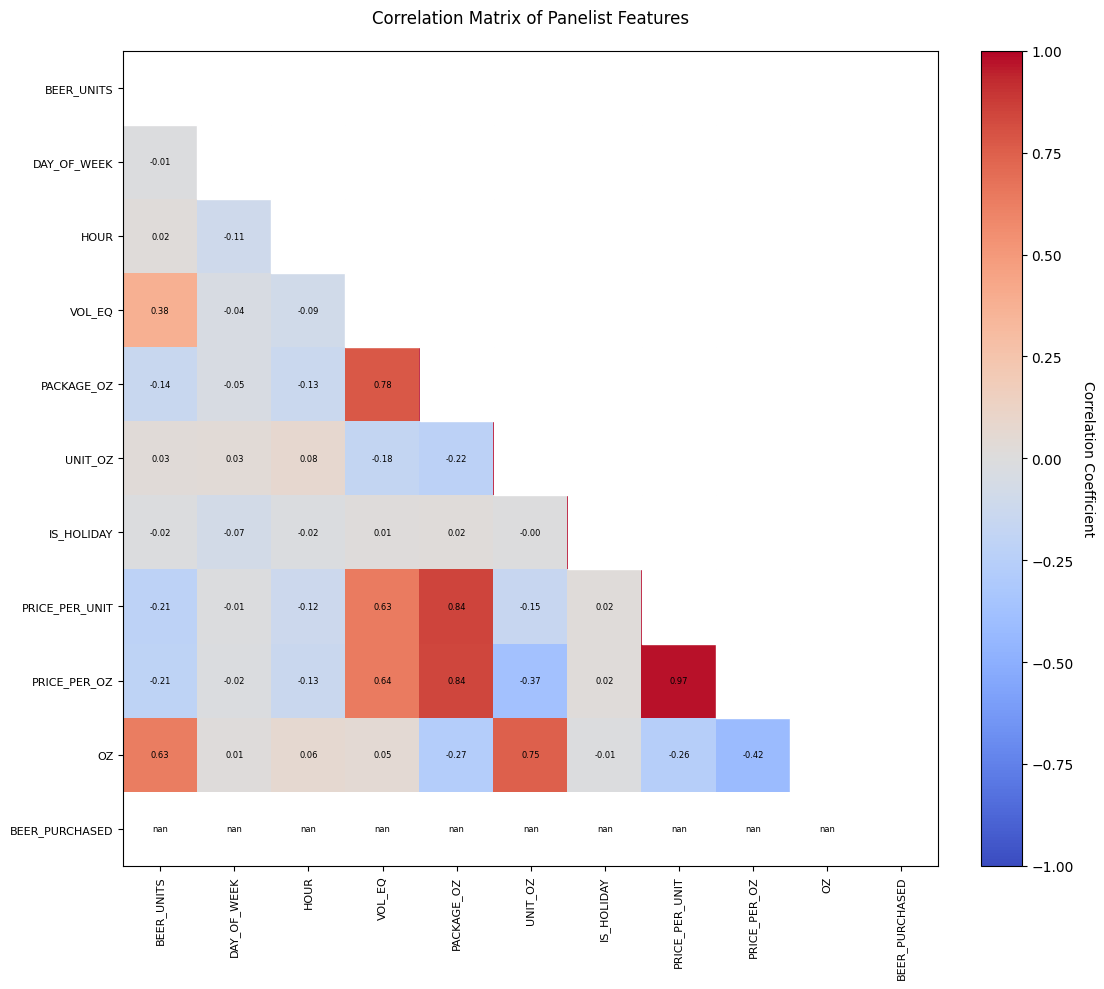

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm

# 1. Load data
beer_df = BeerTransactionsDF.copy()

# 2. Select numeric "panelist" features
numeric = beer_df.select_dtypes(include='number')
drop_cols = [
    'PANID','WEEK','MINUTE','UNITS','BEER_PRICE','IRI_KEY','UPC',
    'UNIT_PRICE','WEEK_DATE','BeerOrNot','PROMO','FEATURE','DISPLAY',
    'PRICE_REDUCTION', 'BEER_TXN'
]
panelist = numeric.drop(columns=drop_cols, errors='ignore')

# 3. Compute correlation matrix
corr = panelist.corr()

# 4. Prepare mask (upper triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 5. Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
cmap = plt.get_cmap('coolwarm')
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Draw heatmap squares
heat = ax.imshow(corr, cmap=cmap, norm=norm)

# Add colorbar
cbar = fig.colorbar(heat, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

# Tick labels
labels = corr.columns
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90, fontsize=8)
ax.set_yticklabels(labels, fontsize=8)

# Mask upper triangle cells with white rectangles
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if mask[i, j]:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1,
                          facecolor='white', edgecolor='white'))

# Annotate the lower triangle
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if not mask[i, j]:
            text = f"{corr.iloc[i, j]:.2f}"
            ax.text(j, i, text, ha='center', va='center', color='black', fontsize=6)

# Title & layout
ax.set_title('Correlation Matrix of Panelist Features', pad=20)
plt.tight_layout()
plt.show()


C:\Users\wayne\AppData\Local\Temp\ipykernel_16996\4196272678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['EST_PROFIT'] = revenue['BEER_PRICE'] * 0.20  # if assuming 20% gross margin


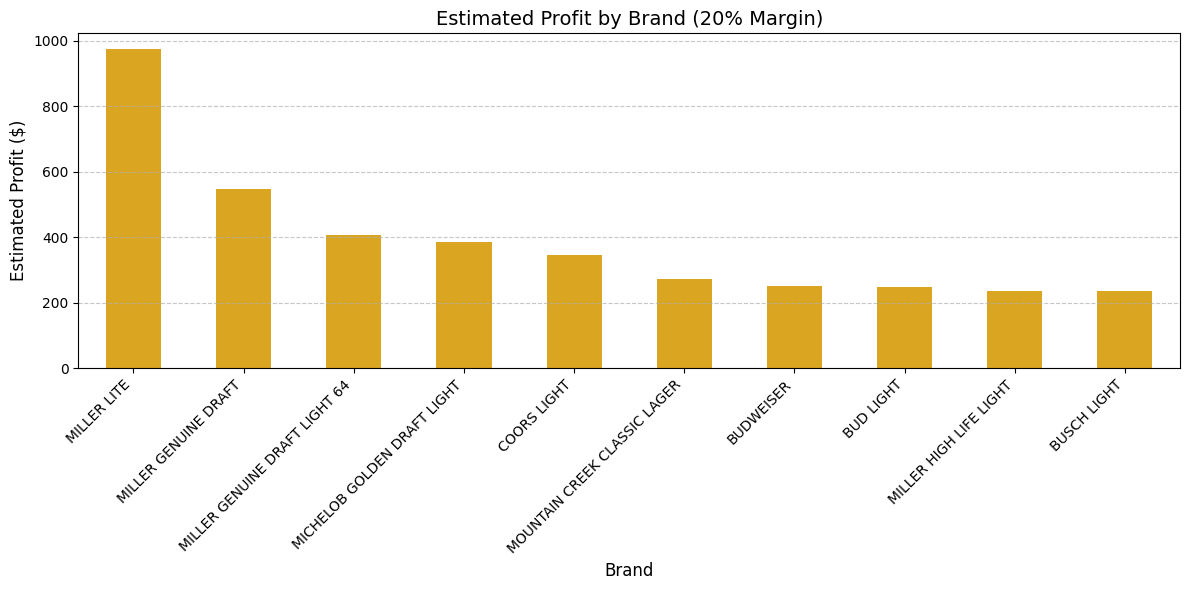

In [9]:
import matplotlib.pyplot as plt

# Profit Margins
revenue = BeerTransactionsDF[BeerTransactionsDF['IRI_KEY']==257871]
revenue['EST_PROFIT'] = revenue['BEER_PRICE'] * 0.20  # if assuming 20% gross margin
brand_profit = revenue.groupby('BRAND')['EST_PROFIT'].sum()

brand_profit_sorted = brand_profit.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
brand_profit_sorted.plot(kind='bar', color='goldenrod')

plt.title('Estimated Profit by Brand (20% Margin)', fontsize=14)
plt.ylabel('Estimated Profit ($)', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [15]:
StoreTransactionsDF.columns

Index(['IRI_KEY', 'WEEK', 'UNITS', 'PURCHASE_PRICE', 'FEATURE', 'DISPLAY',
       'PRICE_REDUCTION', 'UPC', 'UNIT_PRICE', 'PROMO', 'WEEK_DATE'],
      dtype='object')

In [16]:
BeerTransactionsDF.columns

Index(['PANID', 'WEEK', 'MINUTE', 'BEER_UNITS', 'BEER_PRICE', 'IRI_KEY', 'UPC',
       'DAY_OF_WEEK', 'HOUR', 'CATEGORY', 'PARENT_CO', 'VENDOR', 'BRAND',
       'VOL_EQ', 'PRODUCT_TYPE', 'TYPE_OF_BEER', 'PACKAGE', 'FLAVOR_SCENT',
       'SIZE', 'CALORIE_LEVEL', 'COLOR', 'PACKAGE_OZ', 'UNIT_OZ', 'WEEK_DATE',
       'IS_HOLIDAY', 'PRICE_PER_UNIT', 'PRICE_PER_OZ', 'OZ', 'BEER_PURCHASED'],
      dtype='object')

In [19]:
# Group by Age Group Applied to Household Head and summarize key stats
seg = BeerTransactionsDF.merge(StoreTransactionsDF, on=["IRI_KEY", "UPC"], how="inner").merge(CustDemographicDF, on="PANID", how="left")
#seg['FEATURE'] = seg['FEATURE'].str.upper().ne('NONE').astype(int)

seg = seg.groupby('AGE_HH').agg(
    n_purchases=('BEER_UNITS', 'sum'),
    avg_price=('PRICE_PER_OZ', 'mean'),
    promo_rate=('FEATURE', lambda x: (x > 0).mean()),
    display_rate=('DISPLAY', lambda x: (x > 0).mean()),
    pr_rate=('PRICE_REDUCTION', lambda x: (x > 0).mean()),
).reset_index()

seg

,AGE_HH,n_purchases,avg_price,promo_rate,display_rate,pr_rate
0,2,1549,0.891791,0.031228,0.216466,0.063875
1,3,20526,0.873434,0.036478,0.185017,0.112957
2,4,83542,0.902178,0.036102,0.197461,0.091852
3,5,129573,0.793073,0.032195,0.156912,0.087448
4,6,72599,0.970094,0.048979,0.218985,0.113752


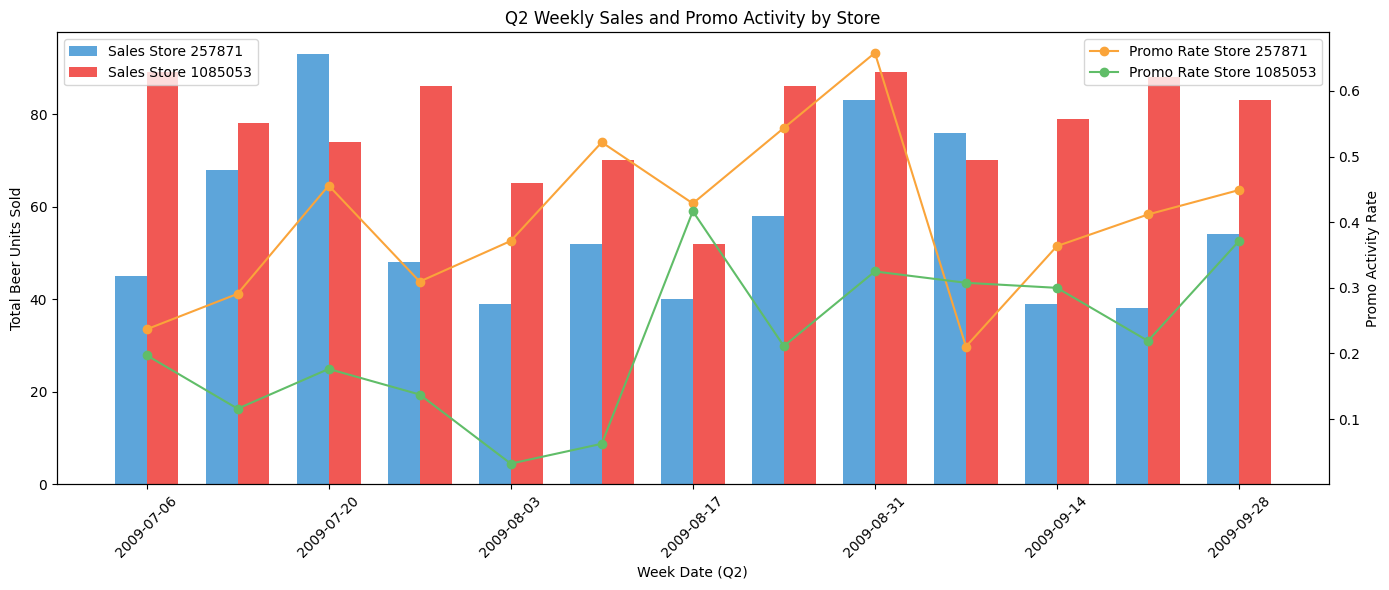

In [ ]:
beer = BeerTransactionsDF.merge(StoreTransactionsDF, on=["IRI_KEY", "UPC", "WEEK", "WEEK_DATE"], how="left").merge(WeekMapDF, on=["WEEK", "WEEK_DATE"], how="left")
beer = beer[beer['WEEK_DATE'].dt.quarter == 3]  # Filter for Q2

beer['ON_PROMO'] = ((beer['FEATURE'] == 1) | (beer['DISPLAY'] == 1) | (beer['PRICE_REDUCTION'] == 1)).astype(int)

# Group by store and WEEK_DATE
store_weekly = beer.groupby(['IRI_KEY', 'WEEK_DATE']).agg(
    Total_Sales=('BEER_UNITS', 'sum'),
    Avg_Promo_Rate=('ON_PROMO', 'mean')
).reset_index()

# Sort by WEEK_DATE
store_weekly = store_weekly.sort_values('WEEK_DATE')

# Get unique stores and sorted week dates
stores = store_weekly['IRI_KEY'].unique()
week_dates = sorted(store_weekly['WEEK_DATE'].unique())
x = np.arange(len(week_dates))
bar_width = 0.35

# Set up plot
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()

# Colors
bar_colors = ['#5DA5DA', '#F15854']
line_colors = ['#FAA43A', '#60BD68']

# Plot for each store
for idx, store in enumerate(stores):
    subset = store_weekly[store_weekly['IRI_KEY'] == store]
    week_indices = [week_dates.index(wd) for wd in subset['WEEK_DATE']]
    bar_positions = np.array(week_indices) + (idx - 0.5) * bar_width
    ax1.bar(bar_positions, subset['Total_Sales'], bar_width, label=f'Sales Store {store}', color=bar_colors[idx])
    ax2.plot(week_indices, subset['Avg_Promo_Rate'], marker='o', color=line_colors[idx], label=f'Promo Rate Store {store}')

# Format x-axis
ax1.set_xticks(x[::2])  # Show every 2nd week for readability
ax1.set_xticklabels([wd.strftime('%Y-%m-%d') for wd in week_dates[::2]], rotation=45)
ax1.set_xlabel('Week Date (Q2)')
ax1.set_ylabel('Total Beer Units Sold')
ax2.set_ylabel('Promo Activity Rate')

plt.title('Q2 Weekly Sales and Promo Activity by Store')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


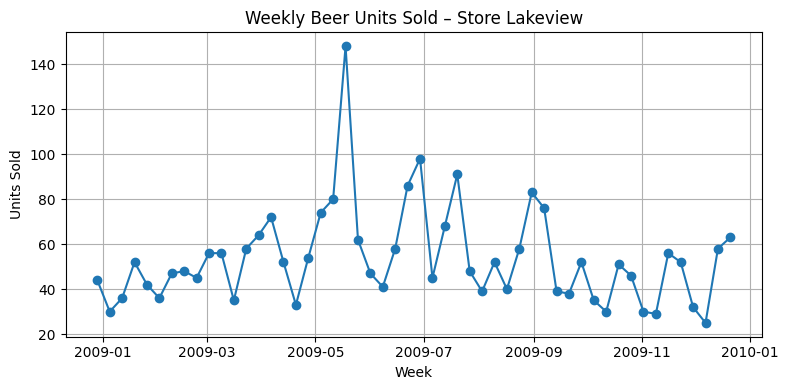

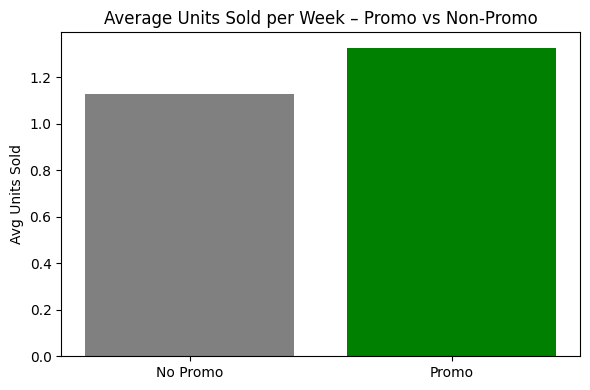

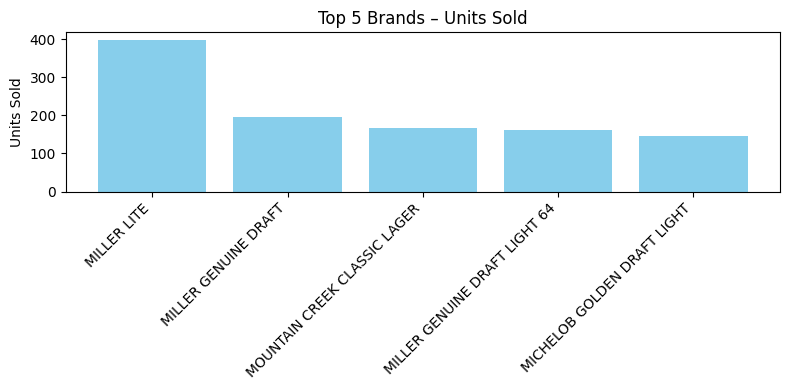

In [36]:
# Load datasets
beer = BeerTransactionsDF.merge(StoreTransactionsDF, on=["IRI_KEY", "UPC", "WEEK", "WEEK_DATE"], how="inner")

# Filter for store 257871
IRI_KEY_FILTER = 257871
beer = beer[beer["IRI_KEY"] == IRI_KEY_FILTER].copy()

# 1. Weekly Beer Units Sold (Line Chart)
weekly_units = beer.groupby("WEEK_DATE")["BEER_UNITS"].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(weekly_units["WEEK_DATE"], weekly_units["BEER_UNITS"], marker="o")
plt.title("Weekly Beer Units Sold – Store Lakeview")
plt.xlabel("Week")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
#plt.savefig("/mnt/data/weekly_units.png")

# 2. Promo vs Non-Promo Avg Units Sold (Bar Chart)

beer["ANY_PROMO"] = ((beer["FEATURE"]) | (beer["DISPLAY"]) | (beer["PRICE_REDUCTION"])).astype(int)

promo_units = beer.groupby("ANY_PROMO")["BEER_UNITS"].mean().reset_index()
promo_units["ANY_PROMO"] = promo_units["ANY_PROMO"].map({0: "No Promo", 1: "Promo"})

plt.figure(figsize=(6, 4))
plt.bar(promo_units["ANY_PROMO"], promo_units["BEER_UNITS"], color=["gray", "green"])
plt.title("Average Units Sold per Week – Promo vs Non-Promo")
plt.ylabel("Avg Units Sold")
plt.tight_layout()
#plt.savefig("/mnt/data/promo_vs_nonpromo.png")

# 4. Brand Market Share (Bar Chart)
brand_share = beer.groupby("BRAND")["BEER_UNITS"].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(8, 4))
plt.bar(brand_share["BRAND"], brand_share["BEER_UNITS"], color="skyblue")
plt.title("Top 5 Brands – Units Sold")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig("/mnt/data/brand_market_share.png")
